# Implemeting neural network for XOR problem with tensorflow

###### import some libraries

In [15]:
#For intaller just write in your venv this link
#pip install tensorflow
import tensorflow as tf
import numpy as np

###### Colleting Dataset

In [16]:
X = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])
y = np.array([[1], [1], [0], [0]])

###### Define a placeholder for input x and output y

In [21]:
# If you have this error after an upgrade to 
# TensorFlow 2.0, you can still use 1.X API by replacing:
# dummy nodes: provide entry computational graph
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

phX = tf.placeholder(tf.float32, [None, 2])
phY = tf.placeholder(tf.float32, [None, 1])

###### Foward function and init weights

In [25]:
def forward(x, w1, b1, w2, b2, train=True):
    Z = tf.nn.sigmoid(tf.matmul(x, w1) + b1)
    Z2 = tf.matmul(Z, w2) + b2
    if train:
        return Z2
    return tf.nn.sigmoid(Z2)
#Variables are in-memory buffers containing tensors
def init_weight(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.05), name='layers')


###### Init weights & 7 hide nodes

In [36]:
#Create Tensorflow variables must
#initialized.
w1 = init_weight([2, 7])
b1 = init_weight([7])
w2 = init_weight([7, 1])
b2 = init_weight([1])

In [37]:
y_hat = forward(phX, w1, b1, w2, b2)
predict = forward(phX, w1, b1, w2, b2, False)

###### Init learning rate, epochs, cost function

In [58]:
lr = 0.01
epochs = 500
cost = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=y_hat, 
                                                labels=phY))

###### Init train function with Adam optimizer

In [59]:
train = tf.train.AdamOptimizer(lr).minimize(cost)
# train = tf.train.RMSPropOptimizer(lr).minimize(cost)

###### Save costs for ploting

In [60]:
costs = []

# create a session and init variables
# Session object encapsulates the environment in which Tensor objects 
# are evaluated
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [61]:
#start training
for i in range(epochs):
    sess.run(train, feed_dict={phX: X, phY:y})
    
    c = sess.run(cost, feed_dict={phX: X, phY:y})
    costs.append(c)
    if i % 100 == 0:
        print(f"Interation {i}. Cost: {c}.")
    
print("Training complete.")

Interation 0. Cost: 0.6939716339111328.
Interation 100. Cost: 0.6870753169059753.
Interation 200. Cost: 0.3541625142097473.
Interation 300. Cost: 0.09847608208656311.
Interation 400. Cost: 0.04580620676279068.
Training complete.


###### Make prediction

In [62]:
prediction = sess.run(predict, feed_dict={phX: X})
print("Percentages: {}".format(prediction))
print("Prediction: {}".format(np.round(prediction)))

Percentages: [[0.9668384 ]
 [0.9918527 ]
 [0.03783179]
 [0.0295058 ]]
Prediction: [[1.]
 [1.]
 [0.]
 [0.]]


###### Plot cost

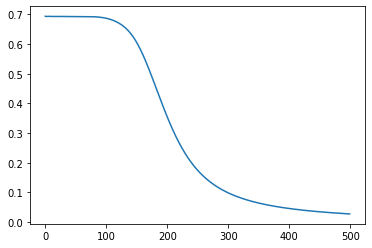

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(costs)
plt.show()

# Implementing XOR gate using  Neural Network 

In [1]:
import numpy as np

In [28]:
# Colleting the input and output (labels)
X = np.array([[0,0], [0,1], [1,0], [1, 1]])
y = np.array([[0,1,1,0]]).T


# initializing m of train and n of features (input)
m = X.shape[0] 
n = X.shape[1]

# initializing hidden layer size
size_layers = 2 

learning_rate = 0.1

#### We initialize the weights that our model learns first as matrices of random variables.

#### Generally the dimensions for each weight vector: size_cur_layer + 1, size_nex_layer

In [30]:
theta_weight_1 = (np.random.random((n+1, size_layers)))
theta_weight_2 = (np.random.random((size_layers+1, 1)))

In [31]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


def forward(X, theta_weight_1, theta_weight_2):
    # first layer
    b1 = np.c_[np.ones(m), X]
    z_hidden = b1.dot(theta_weight_1)
    
    # second layer
    b2 = np.c_[np.ones(m), sigmoid(z_hidden)]
    z_output = b2.dot(theta_weight_2)
    
    # output
    output = sigmoid(z_output)
    
    return output, z_output, b2, z_hidden, b1
    

In [39]:
def sigmoid_grad(z):
    grad = sigmoid(z)
    return grad * (1-grad)

epochs = 2000

#start training
for i in range(epochs):
    output, z_output, b2, z_hidden, b1 = forward(X, theta_weight_1, theta_weight_2)
    
    o_err = y-output
    
    # o erro e encontrado calculando o produto escalar
    # a matris h_err recebe uma multiplicacao por elementos
    # com a saida da primeira camada 
    # levando em conta a funcao de ativacao
    h_err = o_err.dot(theta_weight_2[1:,:].T)
    
    delta_h = o_err
    
    delta_i = h_err*sigmoid_grad(z_hidden)
    
    theta_weight_1 += learning_rate*b1.T.dot(delta_i)
    theta_weight_2 += learning_rate*b2.T.dot(delta_h)
    
    if i % 100 == 0:
        print(f"Interation {i}.")

Interation 0.
Interation 100.
Interation 200.
Interation 300.
Interation 400.
Interation 500.
Interation 600.
Interation 700.
Interation 800.
Interation 900.
Interation 1000.
Interation 1100.
Interation 1200.
Interation 1300.
Interation 1400.
Interation 1500.
Interation 1600.
Interation 1700.
Interation 1800.
Interation 1900.


In [40]:
print("Predicted Values")
print(output)

Predicted Values
[[0.02283808]
 [0.98179594]
 [0.98178578]
 [0.0203429 ]]
